# Random Forest Assignment
## Company data
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('Spectral')

In [47]:
data = pd.read_csv('Company_Data.csv')

##### About the data

Let’s consider a Company dataset with around 10 variables and 400 records.\
The attributes are as follows:
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 

In [48]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Feature Engineering

***Sales*** is our target variable. We have to convert it into categorical variable.

<Axes: xlabel='Sales', ylabel='Count'>

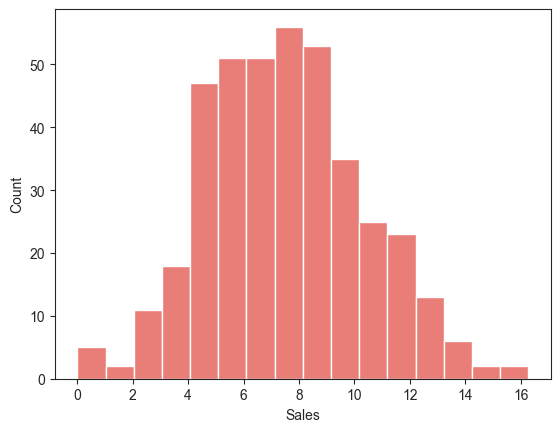

In [50]:
sns.histplot(data['Sales'])

In [51]:
data['Sales'].mean()

7.496325000000001

By investigating ***Sales*** column visually and statistically, we decide our boundary at 7.5\
High Sale (1): Sale>=7.5\
Low Sale (0): Sale<7.5

In [52]:
data['Sales'] = [1 if x>=7.5 else 0 for x in data['Sales']]

In ***Shelvloc*** column, we do label encoding but as in order of quality:\
Good = 2\
Medium = 1\
Bad = 0

In ***Urban*** and ***US*** columns we replace Yes=1 & No=0

In [53]:
data.replace({'Yes':1,'No':0,'Good':2,'Medium':1,'Bad':0}, inplace=True)

In [54]:
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,2,65,10,1,1
2,1,113,35,10,269,80,1,59,12,1,1
3,0,117,100,4,466,97,1,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
5,1,124,113,13,501,72,0,78,16,0,1
6,0,115,105,0,45,108,1,71,15,1,0
7,1,136,81,15,425,120,2,67,10,1,1
8,0,132,110,0,108,124,1,76,10,0,0
9,0,132,113,0,131,124,1,76,17,0,1


### Data Visualization

##### Checking share of high and low sales in target column ***Sales***

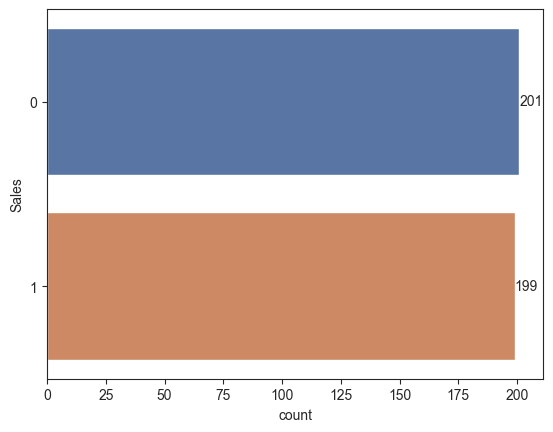

In [55]:
ax = sns.countplot(data=data, y='Sales', palette='deep')
ax.bar_label(ax.containers[0]);

##### Boxplots and Histograms of numerical columns

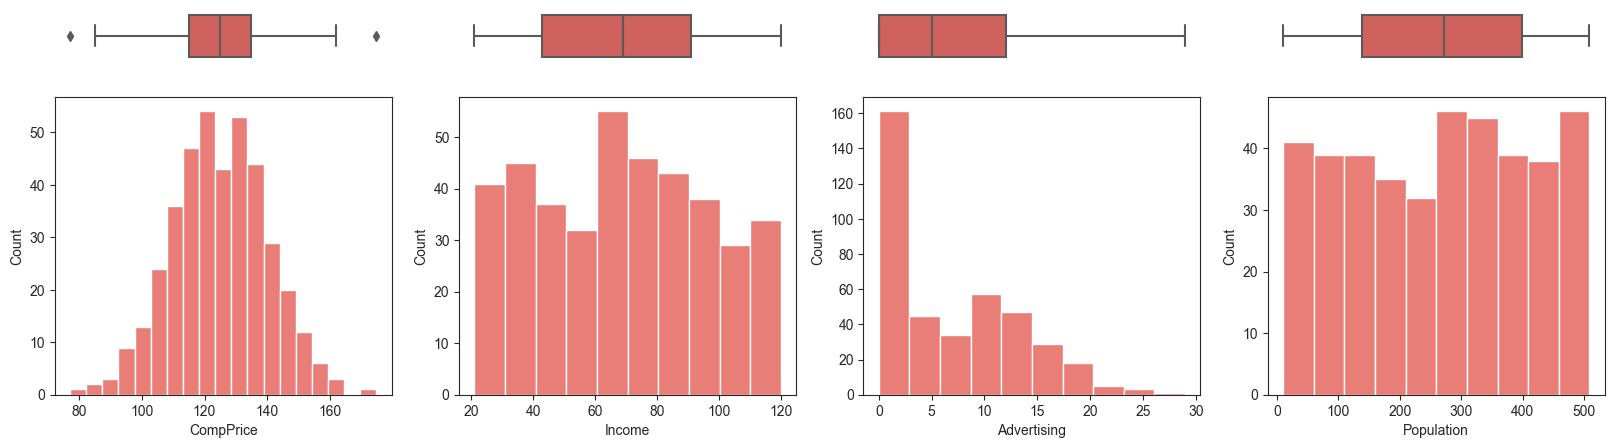

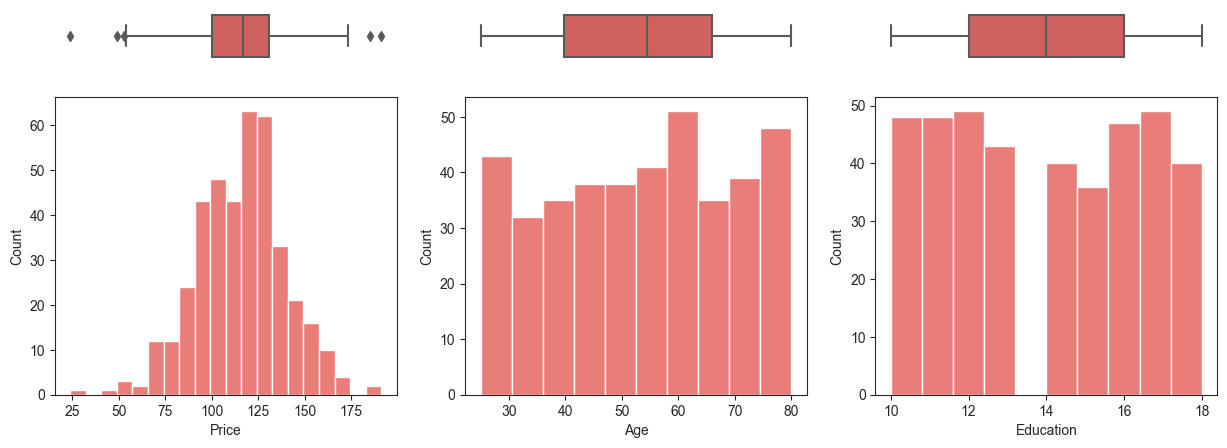

In [56]:
vars1 = ['CompPrice','Income','Advertising','Population']
vars2 = ['Price','Age','Education']

def plotboxhist(vars):
    figs, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=len(vars), figsize=(5*len(vars),5), gridspec_kw={'height_ratios':(0.15,0.85)})
    for i in range(len(vars)):
        sns.boxplot(data=data, x=vars[i], ax=ax_box[i])
        sns.histplot(data=data, x=vars[i], ax=ax_hist[i])
        sns.despine(ax=ax_box[i], left=True, bottom=True)
        ax_box[i].set_xticks([])
        ax_box[i].set_yticks([])
        ax_box[i].set_xlabel('')
    plt.show()

plotboxhist(vars1)
plotboxhist(vars2)

##### Checking share of categories in categorical variables against sales

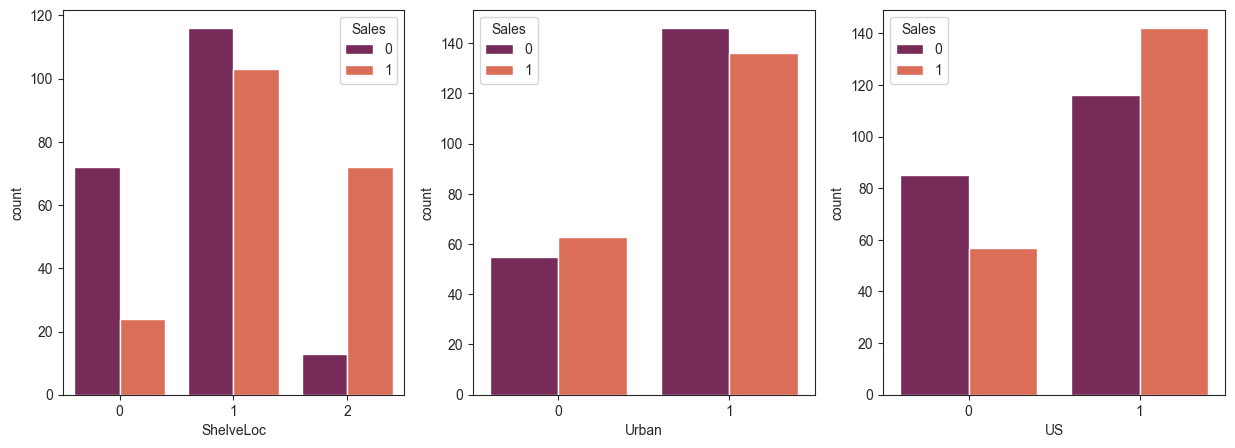

In [57]:
cat_var=['ShelveLoc','Urban','US']

plt.figure(figsize=(15,5)),
for i in range(len(cat_var)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=data, x=cat_var[i], hue='Sales', palette='rocket')

##### Multivariate analysis

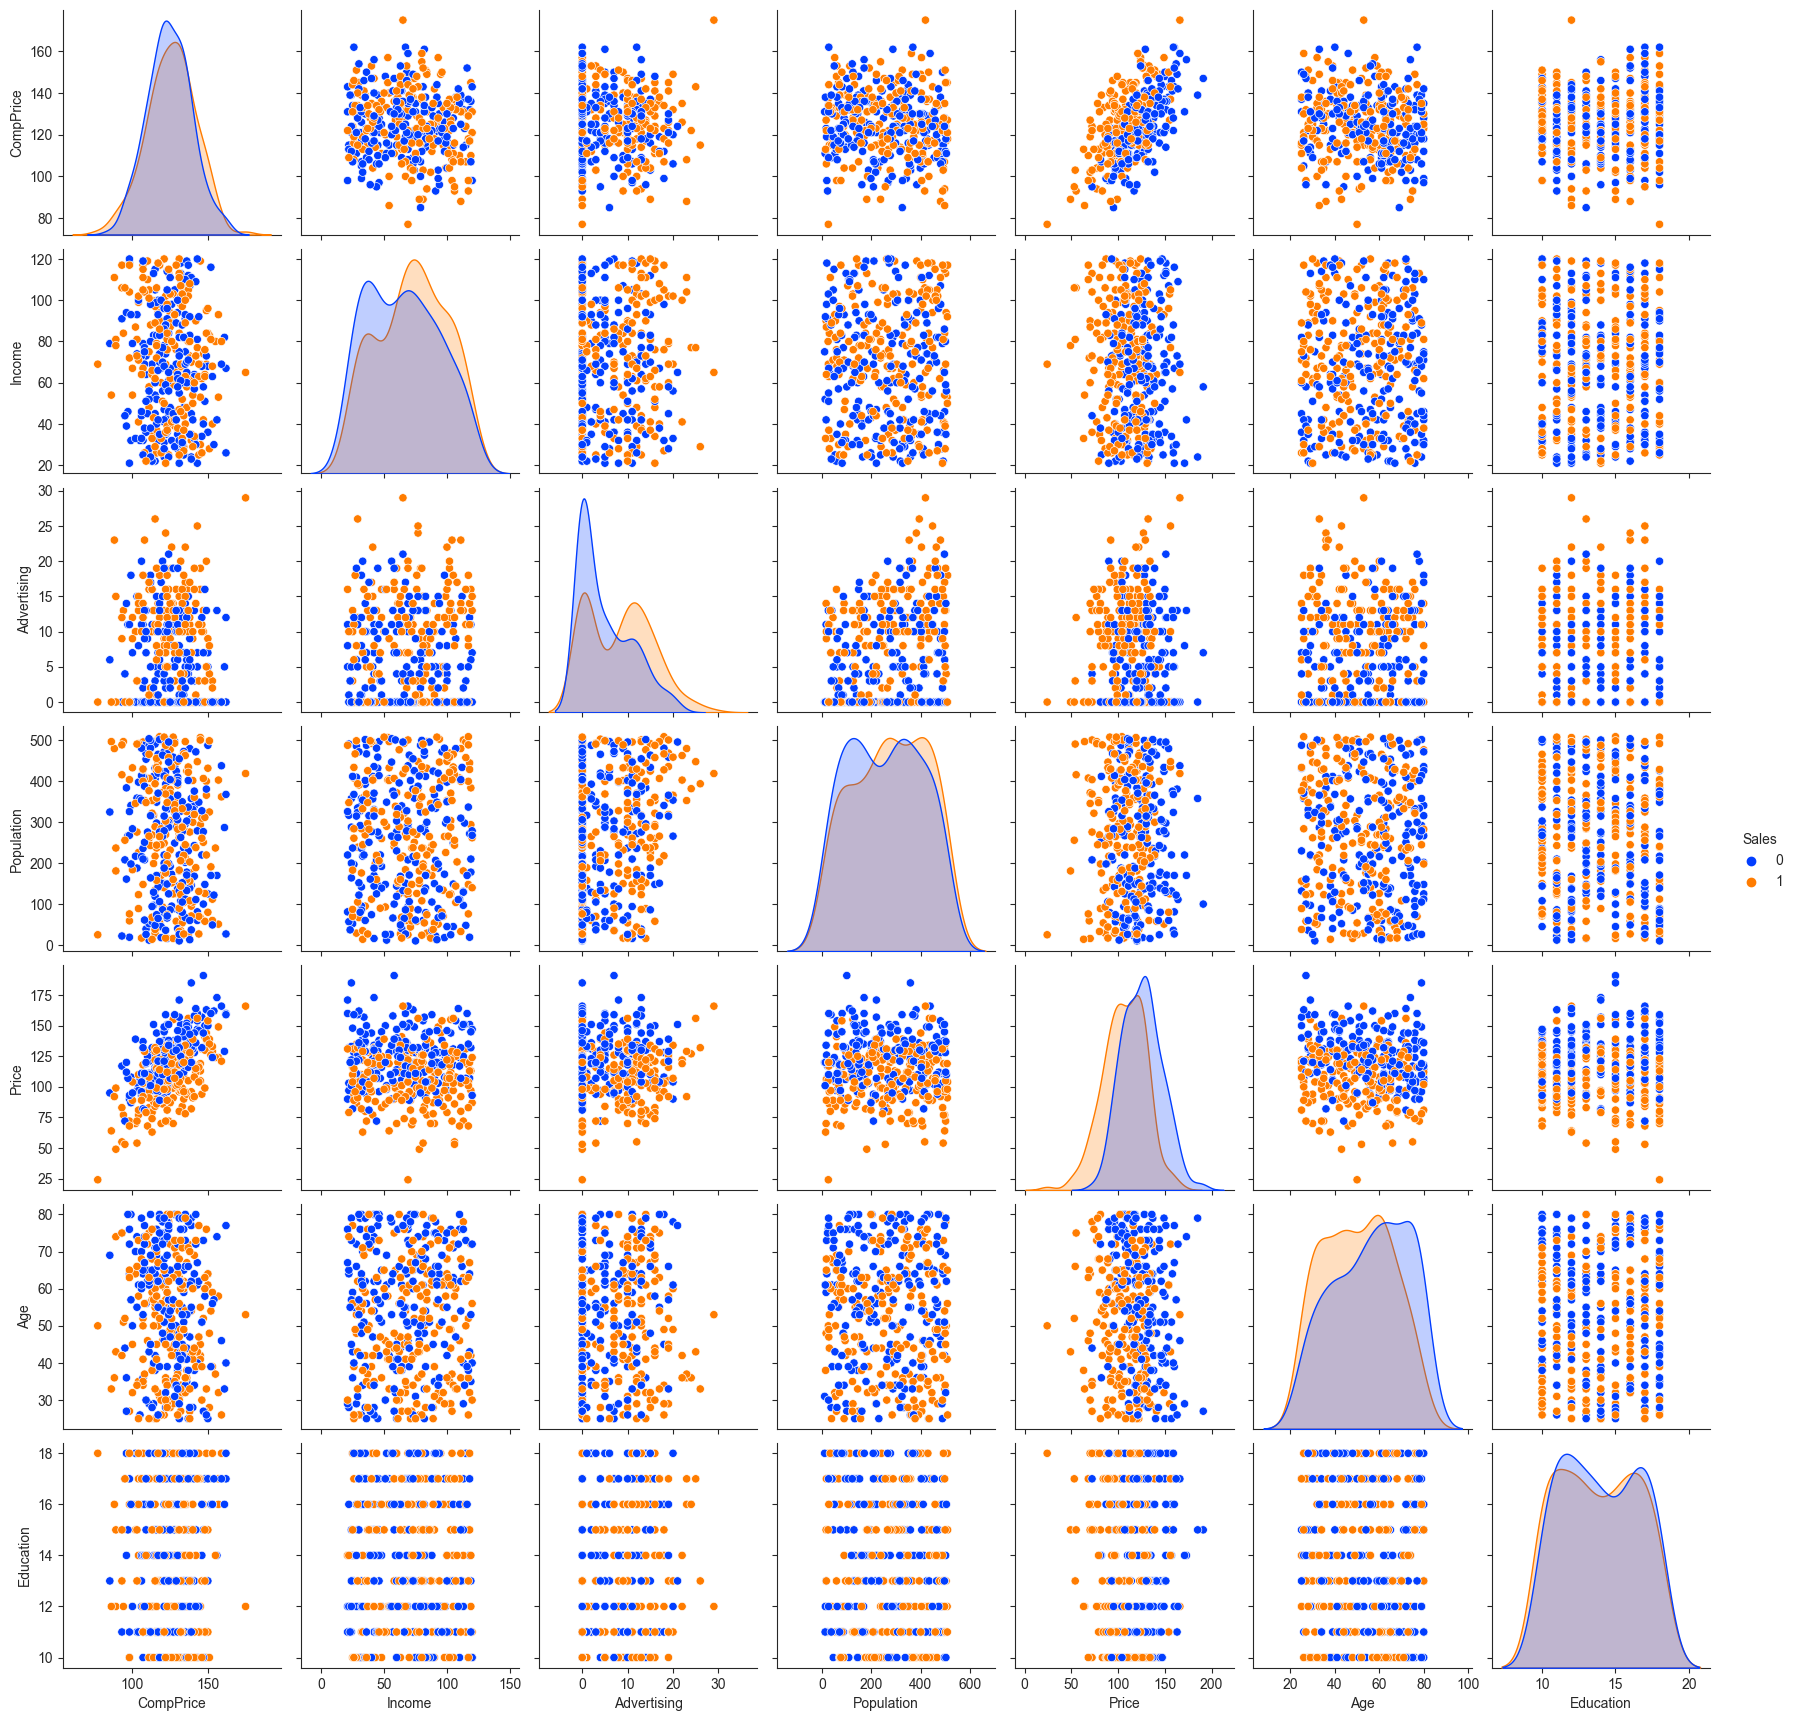

In [58]:
sns.pairplot(data=data.drop(cat_var,axis=1), hue='Sales', palette='bright')

### Preparing data for model

In [59]:
y = data['Sales']
x = data.drop('Sales', axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model Building & Inferences

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

##### Using GridSearchCV to find best parameters for our model.
We will try to optimize following parameters:
- *n_estimators*: The number of trees in the forest.
- *max_depth*: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure.
- *max_features*: max_features can be sqrt(n_features),log2(n_features) or n_features.
- *criterion*: The function to measure the quality of a split.

In [63]:
rfc = RandomForestClassifier()
param_grid = dict(n_estimators=[100,150,200],
                  max_depth=[5, 10, 20, None],
                  max_features=['sqrt','log2',None],
                  criterion=['gini','entropy'])

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 1/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.825 total time=   0.2s
[CV 2/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 2/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.738 total time=   0.2s
[CV 3/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 3/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.787 total time=   0.2s
[CV 4/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 4/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.750 total time=   0.1s
[CV 5/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 5/5; 1/72] END criterion=gini, max_d

In [64]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: 0.825, using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


Building model using best parameters

In [65]:
model = RandomForestClassifier(criterion='entropy',
                               max_depth=None,
                               max_features='sqrt',
                               n_estimators=100)

model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

We can check importance of all features as following

In [66]:
model.feature_importances_

array([0.13861611, 0.0921977 , 0.09698015, 0.09117233, 0.2587755 ,
       0.11936753, 0.12030203, 0.05341978, 0.01569774, 0.01347112])

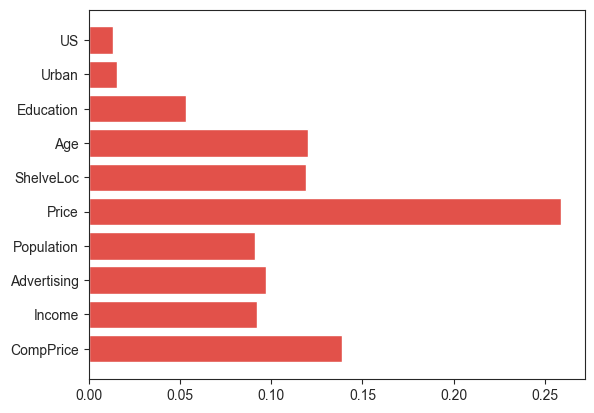

In [67]:
plt.barh(range(10),model.feature_importances_);
plt.yticks(np.arange(10),x.columns);

**From here we can easily see** *Price* **is best feature**

##### Prediction on test data

In [68]:
preds = model.predict(x_test)

Confusion Matrix

In [69]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,31,4
1,7,38


Accuracy

In [70]:
np.mean(y_test==preds)

0.8625

Summarizing

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.90      0.84      0.87        45

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80

